<a href="https://colab.research.google.com/github/alouwyck/vives-intro-to-ai/blob/main/topic8/topic8_intro_to_ML_with_python_demo_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

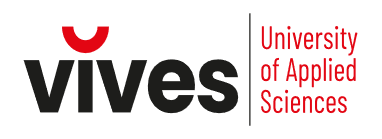<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
VIVES BUSINESS ACADEMY<br>
Academic Year 2023-2024<br>
Andy Louwyck

---



---



# **INTRODUCTION TO MACHINE LEARNING WITH PYTHON**

## **Python libraries**

In [ ]:
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import matplotlib.pyplot as plt  # python library for visualizations
plt.rcParams["figure.dpi"] = 80  # set figure dpi

## **Pandas**

For structured data = tables = DataFrames.

In [ ]:
data = dict(
    day=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    temperature=[15, 10, 12, 18, 16, 11, 17],  # in degrees Celcius
    rain=[3.1, 0.0, 0.2, 2.1, 1.0, 0.0, np.nan],  # in mm
    wind=['strong', 'mild', 'mild', 'mild', 'strong', 'mild', pd.NA]
)

df = pd.DataFrame(data)
df

Checking the data type:

In [ ]:
print(type(df))

Checking if there are missing values:

In [ ]:
np.any(df.isna())  # np.any returns true if at least one element is True

The `info` method gives an overview:

In [ ]:
df.info()

By invoking method `describe`, we get the descriptive statistics of the numerical variables:

In [ ]:
df.describe().T  # use .T to transpose the output

It is also possible to plot these numerical variables:

In [ ]:
df.plot();
plt.grid();

Selecting a specific column can be done in two ways:

In [ ]:
print(df.temperature)
print(df['rain'])

The result of these operations is not a Pandas dataframe, but a Pandas series, which is a 1D data structure:

In [ ]:
print(type(df.rain))

Pandas provides all kind of methods that can be performed on the data. Some examples:

In [ ]:
df.sort_values(by=['rain', 'temperature'])  # sort rows by rain values and then by temperature values

In [ ]:
df.wind.unique()  # unique values in column wind

In [ ]:
df[['temperature', 'rain']].max(axis=0)  # maximum of columns temperature and rain

In [ ]:
df[['temperature', 'rain']].sum(axis=1)  # sum or rows

Data imputation = filling up missing values

In [ ]:
df['wind'] = df['wind'].fillna(df.wind.mode().iloc[0])  # iloc[0] selects the first element
df['rain'] = df['rain'].fillna(df.rain.mean())
df

Another option is to omit the samples containing missing values, which is easy using method `drop`:

In [ ]:
df = df.drop(index=6)
df

Using method `drop`, it is also possible to delete a column:

In [ ]:
df = df.drop(columns=['day'])
df

**Vectorized expressions**

Converting temperature values in Celsius to Fahrenheit

> `°F = °C * 9 / 5 + 32`



In [ ]:
df.temperature = df.temperature * 9 / 5 + 32
df

Similar to SQL, it is also possible to apply the `groupby` method:

In [ ]:
df[['temperature', 'wind']].groupby(by='wind').mean()

## **What is Machine Learning?**

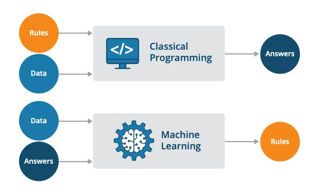

### Classical Programming

Thermostat: when the temperature is lower than 17.5 degrees Celsius, the heating should be on; otherwise, the heating is off.

In [ ]:
threshold = 17
temperature = float(input("What is the temperature?\n"))  # data (input)
heating = 'on' if temperature < threshold else 'off'      # rule
print(f'The heating is {heating}!')                       # answer (output)

### Machine Learning

In Machine Learning, we do not know the rule, but we have a dataset that is labeled in case of supervised learning:

In [ ]:
import pandas as pd

temperature = [17.1, 15.6, 23.1, 19.8, 12.9, 20.3, 14.7, 16.2]  # data (input)
heating = ['off', 'on', 'off', 'off', 'on', 'off', 'on', 'on']  # corresponding answers (output)

# put in Pandas DataFrame to get a table
table = pd.DataFrame(dict(temperature=temperature, heating=heating))
table

It's always a good idea to visualize the data.

In [ ]:
def plot_temperature_heating(table):
    '''
    plots heating vs temperature
    table: Pandas DataFrame with columns 'temperature' and 'heating'
    returns: axes
    '''
    _, ax = plt.subplots(1, 1, figsize=(8, 2))
    on = table.heating == 'on'
    off = ~on
    plt.plot(table[on].temperature, np.ones(on.sum()), 'go');
    plt.plot(table[off].temperature, np.zeros(off.sum()), 'ro');
    plt.xlabel('temperature');
    plt.ylabel('heating');
    plt.yticks((0, 1));
    ax.set_yticklabels(('off', 'on'))
    plt.grid();
    return ax

By plotting the data we see it is easy to separate the 'on' and 'off' temperatures:

In [ ]:
plot_temperature_heating(table);

#### Decision Tree

A naive way of separating both classes is defining the threshold as the average of the maximum 'on' temperature and the minimum 'off' temperature:

In [ ]:
max_temperature_on = table[table.heating=='on']['temperature'].max()
min_temperature_off = table[table.heating=='off']['temperature'].min()
threshold = (max_temperature_on + min_temperature_off) / 2
print(f'maximum temperature if heating is on: {max_temperature_on}°C')
print(f'minimum temperature if heating is off: {min_temperature_off}°C')
print(f'threshold is {threshold}°C')

Let's add the derived threshold to the plot:

In [ ]:
ax = plot_temperature_heating(table);
yl = ax.get_ylim();
ax.plot(threshold * np.ones(2), [-1, 2], 'b-');
ax.set_ylim(yl);

We may use Scikit-Learn to build a **decision tree** that gives the same result:

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier()   # instantiate the DecisionTreeClassifier class

tree.fit(table[['temperature']],  # feature
         table.heating=='on')     # labels

# plot the resulting decision tree
plot_tree(tree, feature_names=['temperature'], class_names=['off', 'on']);

#### Nearest Neighbor

Another way to decide whether the heating is on or off is to simply adopt the output of the **nearest neighbor**:

> $\min_i{|T_{new} - T_i|}$

In [ ]:
temperature = float(input("What is the temperature?\n"))  # input temperature
abs_difference = (temperature - table.temperature).abs()  # absolute difference
heating = table.heating.iloc[abs_difference.argmin()]     # label of nearest neighbor
print(f'The heating is {heating}!')                       # answer

When we visualize the new data point given by the user, then we see the closest point from the dataset has label 'on' indeed:

In [ ]:
ax = plot_temperature_heating(table);
ax.plot(temperature, heating == 'on', 'bo');

It is a special case of a very well-known machine learning algorithm, called **K Nearest Neighbors** (KNN).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)  # number of neighbors K is set to 1

knn.fit(table[['temperature']],  # feature
        table.heating=='on')     # labels

knn.predict(pd.DataFrame(dict(temperature=[16.5])))  # predict heating for new temperature

## **Scikit-Learn**

The Scikit-Learn API is the same for all machine learning algorithms, and it revolves around three fundamental methods:

1. **`fit`**

2. **`score`**

3. **`predict`**


These methods reflect the fundamental steps in the machine learning workflow:

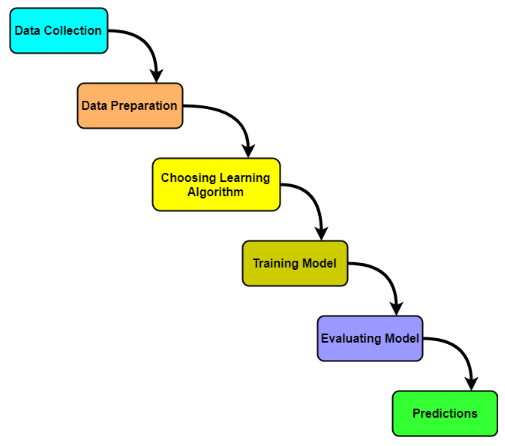

### Choosing the algorithm

Instantiate the class:

In [ ]:
# decision tree
tree = DecisionTreeClassifier()

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=1)  # n_neighbors K is a hyperparameter

### Data preparation

Categorical variables using strings must be transformed, which is called **feature encoding**.

In [ ]:
X = table[['temperature']]    # X must be 2D; hence the double square brackets!
y = table['heating'] == 'on'  # labels are converted to zeros/falses and ones/trues!

### Model training

Training the models:

In [ ]:
# decision tree
tree.fit(X, y)

In [ ]:
# KNN
knn.fit(X, y)  # lazy learning!

### Model evaluation

Calculating the accuracy:

In [ ]:
# decision tree
tree.score(X, y)

In [ ]:
# KNN
knn.score(X, y)

### Making predictions

New data points:

In [ ]:
Xnew = pd.DataFrame(
    dict(temperature=[12, 16.5, 17.5, 22])
)
Xnew

Predicting the labels:

In [ ]:
# decision tree
y_pred = tree.predict(Xnew)
y_pred

In [ ]:
# KNN
y_pred = knn.predict(Xnew)
y_pred

In [ ]:
idx = y_pred.astype(int)          # indices
labels = np.array(['off', 'on'])  # labels: off has index 0, on has index 1!
labels[idx]

## **The Cocktail Example**

Consider the following "cocktail" dataset, indicating which cocktails make us happy or sick:

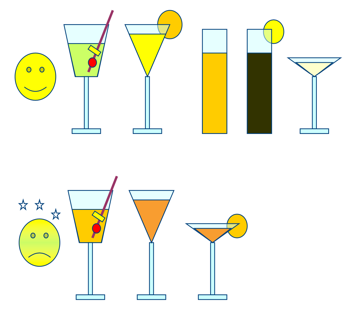

### Data preparation

Let's turn this dataset into a Pandas dataframe:

In [ ]:
df = pd.DataFrame(columns=["shape", "foot", "color", "lemon", "stirrer", "sick"],
                  data=[["trapezium", "yes", "other", "no", "yes", "no"],
                        ["triangle", "yes", "other", "yes", "no", "no"],
                        ["rectangle", "no", "orange", "no", "no", "no"],
                        ["rectangle", "no", "other", "yes", "no", "no"],
                        ["triangle", "yes", "other", "no", "no", "no"],
                        ["trapezium", "yes", "orange", "no", "yes", "yes"],
                        ["triangle", "yes", "orange", "no", "no", "yes"],
                        ["triangle", "yes", "orange", "yes", "no", "yes"]])
df

The first 'preprocessing' step is **encoding** these features and labels.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# features
features = df[["shape", "foot", "color", "lemon", "stirrer"]]
feature_encoder = OrdinalEncoder()
X = feature_encoder.fit_transform(features)

# labels
labels = df['sick']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

The encoders convert the string values into numerical values:

In [ ]:
np.hstack((X, y[:, np.newaxis]))  # creates matrix [X, y]

The `categories_` and `classes_` attributes show which class is represented by which integer:

In [ ]:
feature_encoder.categories_

In [ ]:
label_encoder.classes_

### Decision tree

The second step is **training** the model and calculating the **accuracy**.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier()  # instantiate
tree.fit(X, y)                   # train
tree.score(X, y)                 # evaluate

Let's plot the tree:

In [ ]:
out = plot_tree(tree,
                feature_names=feature_encoder.feature_names_in_,
                class_names=label_encoder.classes_,
                impurity=False, filled=True, fontsize=10, rounded=True);

# the following lines of code are applicable only to this tree:
out[0].set_text(out[0].get_text().replace("<= 0.5", feature_encoder.categories_[2][0]))
out[1].set_text(out[1].get_text().replace("<= 0.5", feature_encoder.categories_[1][0]))

Let's figure out whether we will get sick if we try this new cocktail:

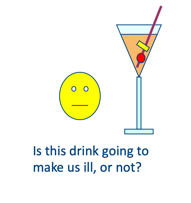

We create a Pandas dataframe containing this new data example:

In [ ]:
new = pd.DataFrame(dict(shape=["triangle"],
                        foot=["yes"],
                        color=["orange"],
                        lemon=["no"],
                        stirrer=["yes"],
                        sick=["???"]))
new

We encode the new data point:

In [ ]:
Xnew = feature_encoder.transform(new[new.columns[:-1]]).astype(int)
Xnew

And we predict whether or not we'll get sick:

In [ ]:
label = tree.predict(Xnew)[0]
print("Will we get sick?", label_encoder.classes_[label])

### Nearest Neighbor

Do we get the same result if we apply KNN (with K=1)?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)  # number of neighbors K is set to 1
knn.fit(X, y)    # train
knn.score(X, y)  # evaluate

The predicted label for the new cocktail:

In [ ]:
label = knn.predict(Xnew)[0]
print("Will we get sick?", label_encoder.classes_[label])

---